## Task-C: Regression outlier effect.

<font face='georgia'> <h3> Objective:Visualization best fit linear regression line for different scenarios</h3> </font>

In [1]:
# you should not import any other packages
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.linear_model import SGDRegressor

In [2]:
import numpy as np
import scipy as sp
import scipy.optimize

def angles_in_ellipse(num,a,b):
    assert(num > 0)
    assert(a < b)
    angles = 2 * np.pi * np.arange(num) / num
    if a != b:
        e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
        tot_size = sp.special.ellipeinc(2.0 * np.pi, e)
        arc_size = tot_size / num
        arcs = np.arange(num) * arc_size
        res = sp.optimize.root(
            lambda x: (sp.special.ellipeinc(x, e) - arcs), angles)
        angles = res.x 
    return angles

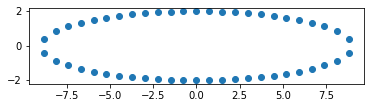

In [3]:
a = 2
b = 9
n = 50

phi = angles_in_ellipse(n, a, b)
e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
arcs = sp.special.ellipeinc(phi, e)

fig = plt.figure()
ax = fig.gca()
ax.axes.set_aspect('equal')
ax.scatter(b * np.sin(phi), a * np.cos(phi))
plt.show()

In [4]:
X= b * np.sin(phi)
Y= a * np.cos(phi)

<pre>
<font face='georgia'>
<i>
1. As a part of this assignment you will be working the regression problem and how regularization helps to get rid of outliers

2. Use the above created X, Y for this experiment.

3. to do this task you can either implement your own SGDRegression(prefered) excatly similar to "SGD assignment" with mean sequared error or 
you can use the SGDRegression of sklearn, for example "SGDRegressor(alpha=0.001, eta0=0.001, learning_rate='constant',random_state=0)" 
note that you have to use the constant learning rate and learning rate <b>eta0</b> initialized.

4. as a part of this experiment you will train your linear regression on the data (X, Y) with different regularizations alpha=[0.0001, 1, 100] and 
observe how prediction hyper plan moves with respect to the outliers

5. This the results of one of the experiment we did (title of the plot was not metioned intentionally) 
<img src='https://i.imgur.com/FctjBiD.png'> 
in each iteration we were adding single outlier and observed the movement of the hyper plane.

6. please consider this list of outliers: [(0,2),(21, 13), (-23, -15), (22,14), (23, 14)] in each of tuple the first elemet 
is the input feature(X) and the second element is the output(Y)

7. for each regularizer, you need to add these outliers one at time to data and then train your model 
again on the updated data. 

8. you should plot a 3*5 grid of subplots,
 where each row corresponds to results of model with a single regularizer.

9. Algorithm: 

for each regularizer:
    for each outlier:
        #add the outlier to the data
        #fit the linear regression to the updated data
        #get the hyper plane
        #plot the hyperplane along with the data points

10. MAKE SURE YOU WRITE THE DETAILED OBSERVATIONS, PLEASE CHECK THE LOSS FUNCTION IN THE SKLEARN DOCUMENTATION
 (please do search for it).
</i>
</font>
</pre>

In [5]:
X= b * np.sin(phi)
Y= a * np.cos(phi)

In [6]:
def add_outlier_plot(out_x,out_y,idx,a):
  global X1
  global Y1
  X1 = np.append(X1,out_x)
  Y1 = np.append(Y1,out_y)

  clf = SGDRegressor(alpha=a, eta0=0.001, learning_rate='constant',random_state=0)
  clf.fit(X1.reshape(-1,1),Y1)

  plt.subplot(5,3,idx+1)

  plt.scatter(X1,Y1)
  plt.plot(X1, X1*clf.coef_[0] + clf.intercept_, 'r')
  plt.title("Alpha : "+str(a))
  plt.legend(["Best Fit Hyperplane","Data Points"])

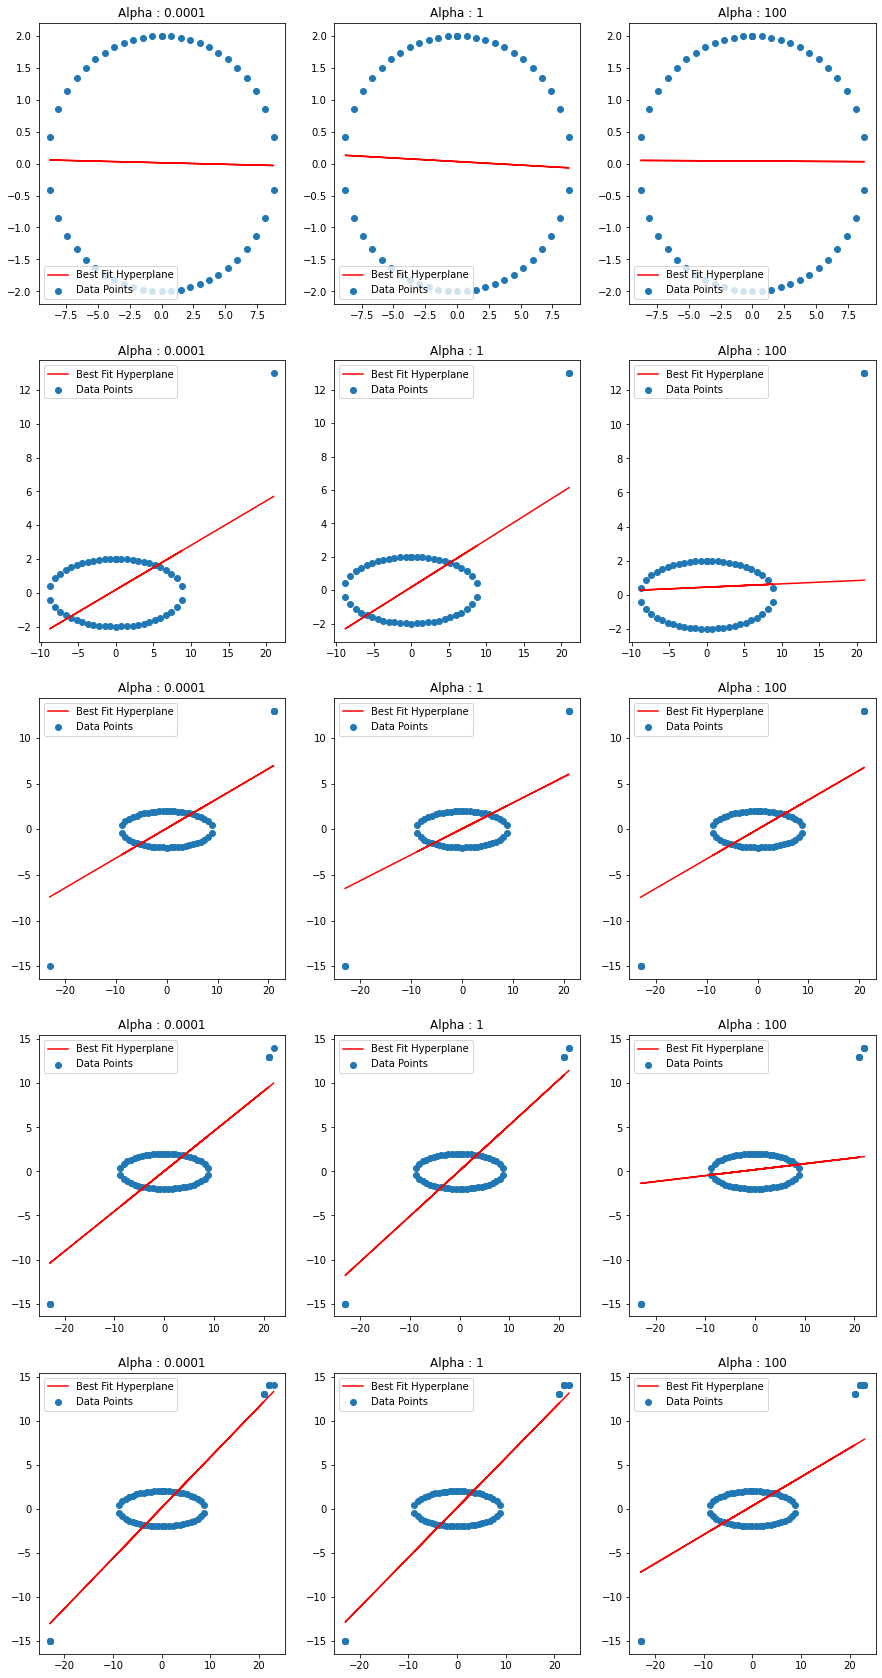

In [7]:
plt.figure(figsize=(15,30))
alphas = [0.0001, 1, 100]
outliers = [(0,2),(21, 13), (-23, -15), (22,14), (23, 14)]
idx = 0

X1 = X
Y1 = Y

for ox,oy in outliers:
  for a in [0.0001, 1, 100]:
    add_outlier_plot(ox,oy,idx,a)
    idx += 1

plt.show()

- **Dataset 1 (No Outlier)**
Without outliers, the regularization term doesnt affect a lot as all 3 values of alpha i.e 0.0001, 1 and 100 give fairly similar hyperplane which try to fit the points.

- **Dataset 2 (1 outlier added)**
When one outlier is added, for a=0.0001 and 1 as regularization term is very small, the hyperplane over compensated for the outlier and gets skewed towards it. When a = 100, the term penalizes the outlier better and a better hyperplane is observed. 

- **Dataset 3 (2 outliers added)**
With 2 outliers which lie on either ends of the space, even though we try to increase regularization term the hyperplane tries to fit the 2 outliers leading to similar hyperplane in all 3 cases.

- **Dataset 4 and 5:**
Here as number of outliers increase, the model tries to fit these points to. When regularization term is sufficiently large i.e a=100, we find that even with the presence of outliers the hyper planes tries to stabilize itself into a horizantal poisition similar to the hyperplane observed with no outliers.